In [602]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [603]:
raw_train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [604]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [605]:
train_ID = raw_train['Id']
test_ID = test['Id']
raw_train.drop("Id", axis=1, inplace = True)
test.drop("Id", axis=1, inplace = True)

In [606]:
raw_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [607]:
raw_train.shape

(1460, 80)

## Analyzing and transforming SalePrice

In [608]:
raw_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

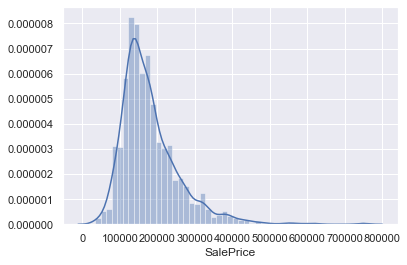

In [609]:
# Normal unimodal distribution with positive skew. We can see that the peak is relatively high - probably leptokurtic
sns.distplot(raw_train['SalePrice'])

In [610]:
# Measures of skew and kurtosis
print("Skew: ", raw_train['SalePrice'].skew())
print("Kurtosis: ", raw_train['SalePrice'].kurtosis())

Skew:  1.8828757597682129
Kurtosis:  6.536281860064529


In [611]:
# perform a log transformation to reduce skewness and kurtosis 
raw_train['SalePrice'] = np.log1p(raw_train['SalePrice'])

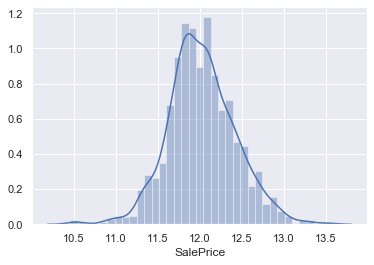

In [612]:
# Normal unimodal distribution with positive skew. We can see that the peak is relatively high - probably leptokurtic
sns.distplot(raw_train['SalePrice'])

In [613]:
# Measures of skew and kurtosis
print("Skew: ", raw_train['SalePrice'].skew())
print("Kurtosis: ", raw_train['SalePrice'].kurtosis())

Skew:  0.12134661989685333
Kurtosis:  0.809519155707878


## Get a sense of correlations

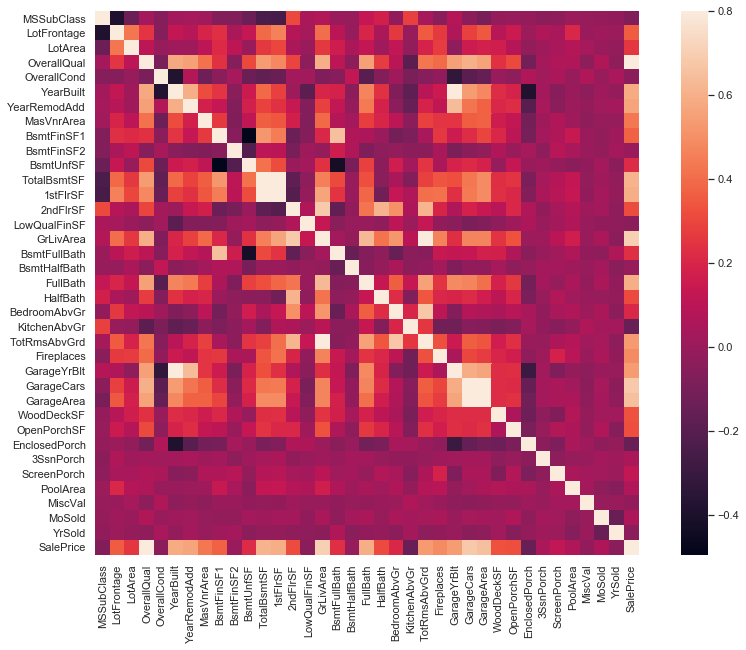

In [614]:
# Features of interest: OverallQuall, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, GarageCars, GarageArea
corrmat = raw_train.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

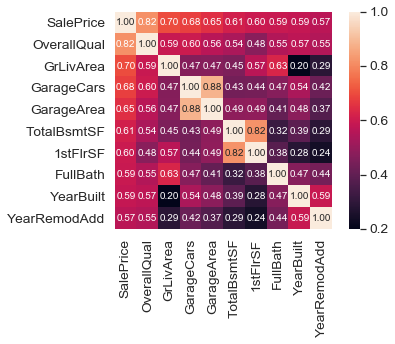

In [615]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(raw_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Get a sense of the relationships between key features and SalePrice

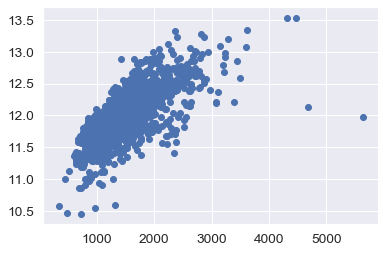

In [616]:
# observe relationship with GrLivArea - this seems to be a linear trend with some degree of heteroscedasticity
plt.scatter(raw_train['GrLivArea'], raw_train['SalePrice'])
plt.show()

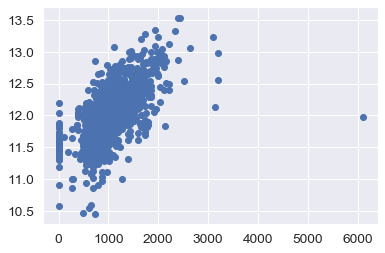

In [617]:
# observe relationship with TotalBsmtSF - this seems to be an exponential trend
plt.scatter(raw_train['TotalBsmtSF'], raw_train['SalePrice'])
plt.show()

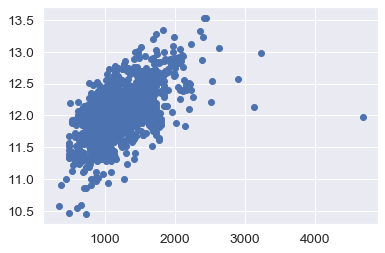

In [618]:
# observe relationship with 1stFlrSF - this seems to be a linear trend with minimal heteroscedasticity
plt.scatter(raw_train['1stFlrSF'], raw_train['SalePrice'])
plt.show()

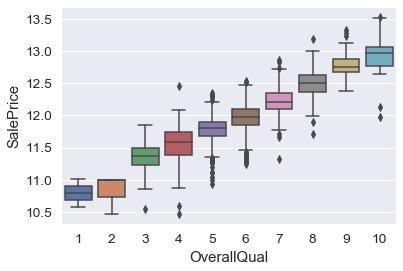

In [619]:
# observe relationship with OverallQual - this seems to be a strong positive trend
sns.boxplot(raw_train['OverallQual'], raw_train['SalePrice'])

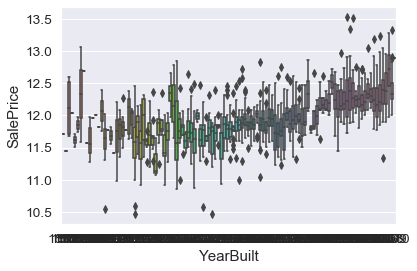

In [620]:
# observe relationship with YearBuilt - again a positive trend, though it is less strong 
sns.boxplot(raw_train['YearBuilt'], raw_train['SalePrice'])

## Data cleaning: dealing with missing values

In [621]:
raw_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [622]:
# Alley, PoolQC, Fence, and MiscFeature have more than 50% missing values - we will drop these entirely
raw_train.drop(['Fence', 'PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace = True)

# Drop utilities - majority of values are AllPub
raw_train.drop(['Utilities'], axis=1, inplace = True)

In [623]:
# LotFrontage, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt,
# GarageFinish, GarageQual, and GarageCond all still have missing values that must be dealt with


In [624]:

#cols_to_keep = 
#raw_train.drop(raw_train.columns.difference(cols_to_keep), axis=1)

## Data cleaning: converting categorical features into dummy variables 

In [625]:
raw_train = pd.get_dummies(raw_train, drop_first = True)

## Data cleaning: dealing with outliers

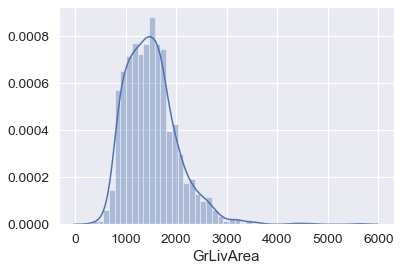

In [626]:
# notice outliers on far right 
sns.distplot(raw_train['GrLivArea'])

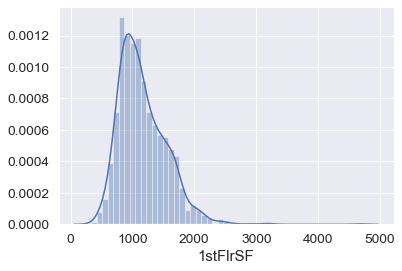

In [627]:
# notice outliers on far right 
sns.distplot(raw_train['1stFlrSF'])

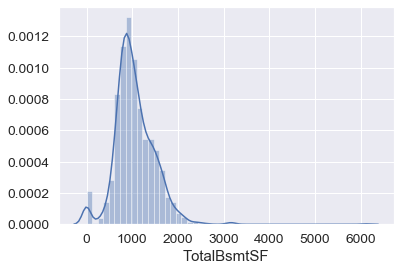

In [628]:
# notice outliers on far right 
sns.distplot(raw_train['TotalBsmtSF'])

In [629]:
q = raw_train['GrLivArea'].quantile(0.99)
raw_train = raw_train[raw_train['GrLivArea'] < q]
q = raw_train['1stFlrSF'].quantile(0.99)
raw_train = raw_train[raw_train['1stFlrSF'] < q]
q = raw_train['TotalBsmtSF'].quantile(0.99)
raw_train = raw_train[raw_train['TotalBsmtSF'] < q]
raw_train[['OverallQual', 'GrLivArea', 'YearBuilt', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars']].describe()

,OverallQual,GrLivArea,YearBuilt,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars
count,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000
mean,6.031095,1477.065018,1970.913074,1129.163958,1022.915901,463.948410,1.740636
std,1.327713,463.063257,30.087500,330.716780,374.012812,205.880699,0.735930
min,1.000000,334.000000,1872.000000,334.000000,0.000000,0.000000,0.000000
25%,5.000000,1121.500000,1954.000000,874.000000,791.500000,318.500000,1.000000
50%,6.000000,1442.000000,1972.000000,1073.000000,978.000000,473.000000,2.000000
75%,7.000000,1734.000000,2000.000000,1354.500000,1259.000000,576.000000,2.000000
max,10.000000,3112.000000,2010.000000,2129.000000,1992.000000,1356.000000,4.000000


## Scaling the data

In [630]:
from sklearn.preprocessing import StandardScaler

x = raw_train[['OverallQual', 'GrLivArea', 'YearBuilt', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars']]
targets = raw_train[['SalePrice']]

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

## Manually fitting an OLS regression

In [631]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [632]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, targets, test_size=0.2, random_state=42)

In [633]:
k = np.matmul(np.transpose(x_train),x_train)
l = np.linalg.inv(k)

In [634]:
p = np.matmul(l, np.transpose(x_train))

In [635]:
s = np.matmul(p, y_train.values)

In [636]:
s

array([[ 0.17010288],
       [ 0.11127085],
       [ 0.00852765],
       [ 0.05837225],
       [ 0.36301597],
       [-0.06735456],
       [ 0.12669532]])

## Evaluating 

In [637]:
train_pred = np.matmul(x_train, s)

In [638]:
test_pred = np.matmul(x_test, s)

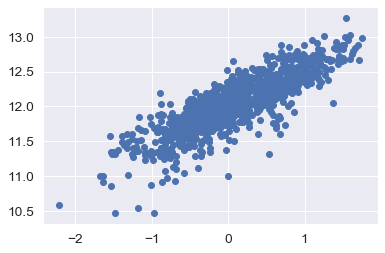

In [639]:
plt.scatter(train_pred, y_train.values)
plt.show()

In [640]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

11.996943584940524

## Fitting an OLS regression 

In [641]:
from sklearn.linear_model import LinearRegression

In [642]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluating 

In [643]:
train_pred = reg.predict(x_train)
test_pred = reg.predict(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

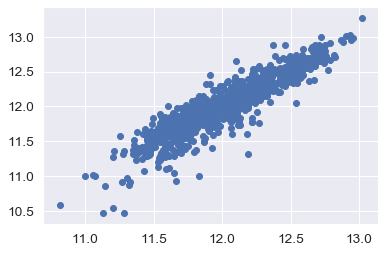

In [644]:
plt.scatter(train_pred, y_train)
plt.show

In [645]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.1555767218966003

## Fitting a gradient boosting regression

In [646]:
from sklearn.ensemble import GradientBoostingRegressor

In [647]:
gradientBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=2500,
                                   min_samples_split=10, min_samples_leaf=13,max_depth=4,
                                   random_state=420,max_features='sqrt')

In [648]:
gradientBoost.fit(x_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=13, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=2500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=420, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluating

In [649]:
train_pred = gradientBoost.predict(x_train)
test_pred = gradientBoost.predict(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

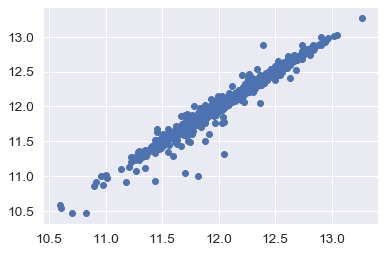

In [650]:
plt.scatter(train_pred, y_train)
plt.show

In [651]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.07124883951362934